In [38]:
!pip install mlxtend==0.23.1


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.4 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.4 MB 310.6 kB/s eta 0:00:03
   -------------- ------------------------- 0.5/1.4 MB 310.6 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.4 MB 325.6 kB/s e

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


df = pd.read_csv("Online Retail dataset.csv", encoding='latin1')



In [5]:
print(df.columns.tolist())

['ï»¿"shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil"']


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv("Online Retail dataset.csv", header=None)

transactions = df[0].apply(lambda x: str(x).split(','))

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


print(df_encoded.head())


    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [10]:

# Step 4: Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 6: Filter rules by confidence and lift
filtered_rules = rules[(rules['confidence'] >= 0.6) & (rules['lift'] >= 1.2)]

# Display the results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
     support         itemsets
0  0.238368  (mineral water)

Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Generate frequent itemsets with lower min_support
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Step 2: Generate association rules with lower thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Step 3: Filter by confidence and lift (optional but useful for stronger rules)
filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1.1)]

# Show results
print("Frequent Itemsets:\n", frequent_itemsets.sort_values(by="support", ascending=False).head(10))
print("\nFiltered Association Rules:\n", filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Frequent Itemsets:
      support             itemsets
34  0.238368      (mineral water)
13  0.179709               (eggs)
44  0.174110          (spaghetti)
17  0.170911       (french fries)
9   0.163845          (chocolate)
24  0.132116          (green tea)
33  0.129583               (milk)
25  0.098254        (ground beef)
22  0.095321  (frozen vegetables)
38  0.095054           (pancakes)

Filtered Association Rules:
             antecedents      consequents   support  confidence      lift
0             (burgers)           (eggs)  0.028796    0.330275  1.837830
4                (cake)  (mineral water)  0.027463    0.338816  1.421397
5             (chicken)  (mineral water)  0.022797    0.380000  1.594172
12          (chocolate)  (mineral water)  0.052660    0.321400  1.348332
16        (cooking oil)  (mineral water)  0.020131    0.394256  1.653978
28    (frozen smoothie)  (mineral water)  0.020264    0.320000  1.342461
30  (frozen vegetables)  (mineral water)  0.035729    0.374825  1

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv("Online Retail dataset.csv", header=None)
transactions = df[0].apply(lambda x: str(x).split(','))

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [9]:
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1.1)]


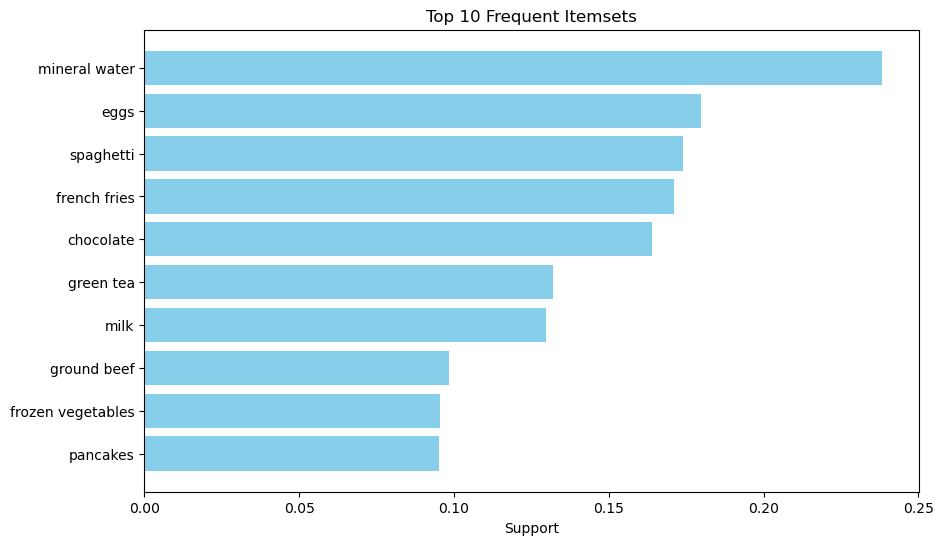

In [13]:
# 1. Bar Chart of Top Frequent Itemsets
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_itemsets['itemsets_str'], top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

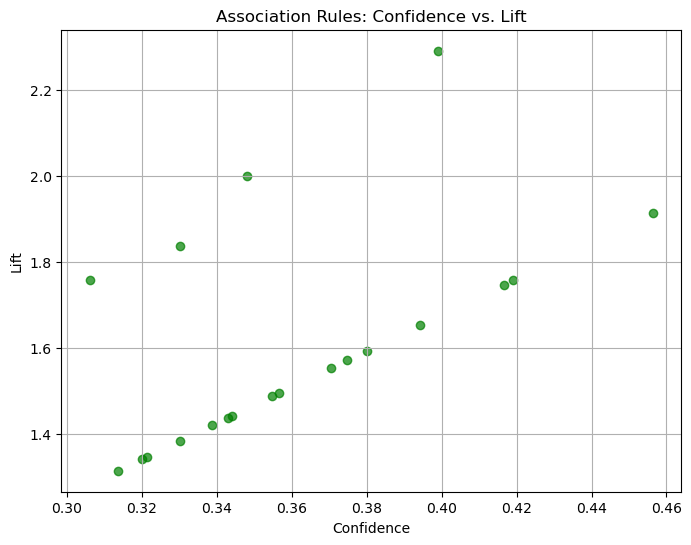

In [11]:
# 2. Scatter Plot of Association Rules
plt.figure(figsize=(8,6))
plt.scatter(filtered_rules['confidence'], filtered_rules['lift'], alpha=0.7, c='green')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs. Lift')
plt.grid(True)
plt.show()

C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


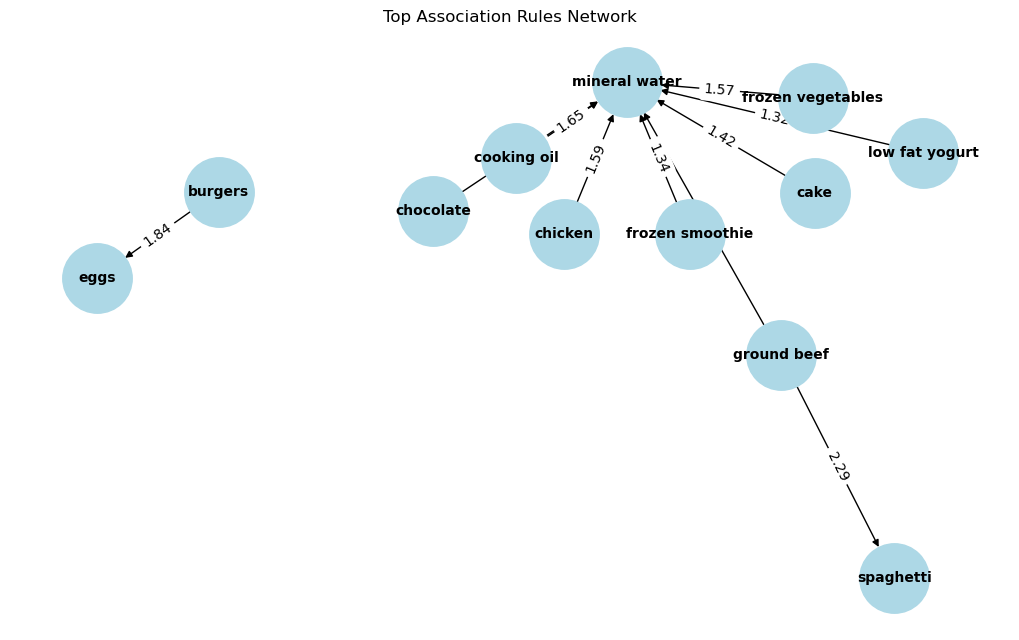

In [12]:
# 3. Network Graph of Top 10 Rules
G = nx.DiGraph()
top_rules = filtered_rules.head(10)
for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', arrows=True, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k,v in labels.items()})
plt.title('Top Association Rules Network')
plt.show()

# Analysis and Interpretation:

### 1. Health-Conscious Behavior
Many rules include mineral water, green tea, low fat yogurt, and frozen vegetables, suggesting a segment of customers prioritizing healthy eating and hydration.

### 2. Classic Meal Combinations
Ground beef + spaghetti

Burgers + eggs

These suggest traditional meal patterns, useful for bundling offers or meal kit planning.

### 3. Balancing Purchases
Combinations like:

Cake → Mineral water

Chocolate → Mineral water

#### All these indicate that even when buying indulgent foods, customers may try to maintain some health balance.



# INTERVIEW QUESTIONS

#### 1. What is lift and why is it important in Association Rules?
Lift measures how much more likely two items are bought together than if they were independent.
It helps identify strong, non-random associations.

Formula:
Lift = Support(A ∩ B) / (Support(A) * Support(B))

A lift > 1 indicates a positive association,
lift = 1 means independence, and
lift < 1 shows a negative association.

#### 2. What is support and confidence? How do you calculate them?
Support indicates how frequently an item or itemset appears in the dataset.
Support(A) = Transactions containing A / Total transactions

Confidence indicates the likelihood that item B is purchased when item A is purchased.
Confidence(A → B) = Support(A ∩ B) / Support(A)

These help filter frequent and reliable rules.


#### 3. What are some limitations or challenges of Association Rule Mining?
Can produce many irrelevant or redundant rules.

Computationally expensive for large datasets.

Doesn’t consider sequence or quantity of items.

May lead to spurious correlations without causation.

Hard to choose the right thresholds for support, confidence, and lift.